In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
X  = df.drop("output",axis=1)
y = df['output']

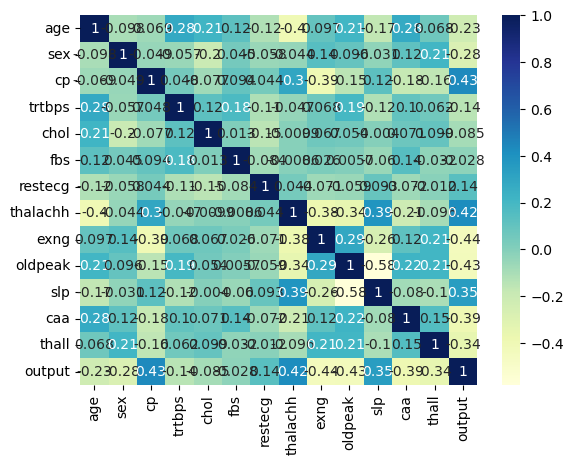

In [4]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(),y.to_numpy(),test_size=0.3)
X_train.shape[0]

212

In [6]:
# Using random sampling technique to select different sizes of training data
from random import sample

percs = [20,40,60,80,100]
criterion = 'gini'

def data_sampling(percs):
    data_dict = {}
    for perc in percs:
        samples= int(X_train.shape[0]*(perc/100))
        workflow_indices = sample(list(np.arange(0,X_train.shape[0])),samples)
        X_work = X_train[workflow_indices]
        y_work = y_train[workflow_indices]
        data_dict[perc] = (X_work,y_work)
    return data_dict

data_dict = data_sampling(percs)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from time import process_time


def time_analysis(data_dict, percs, criterion):
    time_taken={}
    for perc in percs:
        t1 = process_time()
        model = DecisionTreeClassifier(criterion=criterion)
        model.fit(data_dict[perc][0],data_dict[perc][1])
        y_pred = model.predict(X_test)
        t2 = process_time()
        
        time_taken[str(perc)+"%"] = t2-t1
    
    time_df = pd.DataFrame(time_taken, index=["Time Taken (secs)"])
    return time_df

time_analysis(data_dict,percs,criterion)

,20%,40%,60%,80%,100%
Time Taken (secs),0.001622,0.001248,0.001166,0.001268,0.001474


In [8]:
def misclassification_rate(data_dict, percs, criterion):
    misclass={}
    for perc in percs:
        model = DecisionTreeClassifier(criterion=criterion)
        model.fit(data_dict[perc][0],data_dict[perc][1])
        y_pred = model.predict(X_test)
        
        miss = sum([ 1  if y_pred[i]!=y_test[i] else 0 for i in range(len(y_test))])        
        misclass[str(perc)+"%"] = miss*100/len(y_test)
        
    miss_df = pd.DataFrame(misclass, index=["Miss Rate"])
    return miss_df

misclassification_rate(data_dict,percs,criterion)

,20%,40%,60%,80%,100%
Miss Rate,19.78022,28.571429,31.868132,27.472527,23.076923


DATA PERC: 20
Confusion Matrix:
 [[21 16]
 [ 2 52]]


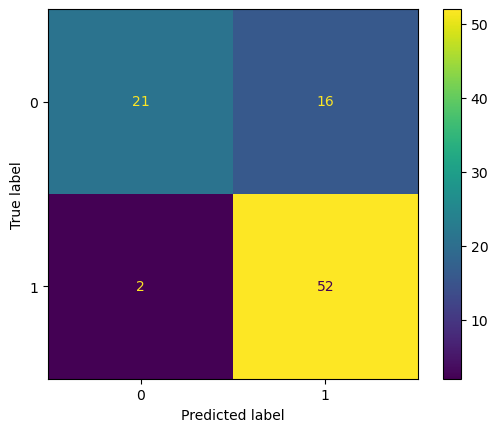

Precision: 0.7647058823529411
Recall: 0.9629629629629629
F1 Score: 0.8524590163934426
Accuracy: 0.8021978021978022
Precision: 0.7647058823529411
Recall: 0.9629629629629629
ROC AUC: 0.7652652652652652
True Positive Rate: 0.5675675675675675
False Positive Rate: 0.23529411764705882
Specificity: 0.7647058823529411
DATA PERC: 40
Confusion Matrix:
 [[23 14]
 [ 9 45]]


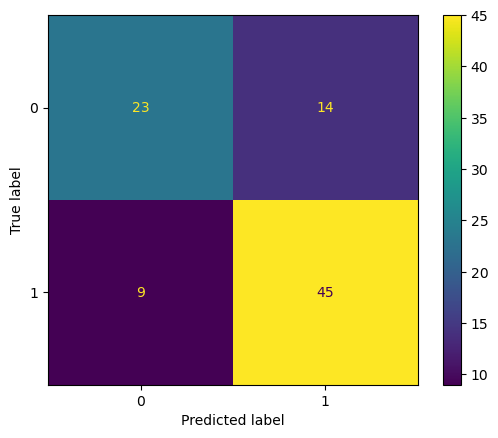

Precision: 0.7627118644067796
Recall: 0.8333333333333334
F1 Score: 0.7964601769911505
Accuracy: 0.7472527472527473
Precision: 0.7627118644067796
Recall: 0.8333333333333334
ROC AUC: 0.7274774774774776
True Positive Rate: 0.6216216216216216
False Positive Rate: 0.23728813559322035
Specificity: 0.7627118644067796
DATA PERC: 60
Confusion Matrix:
 [[19 18]
 [ 8 46]]


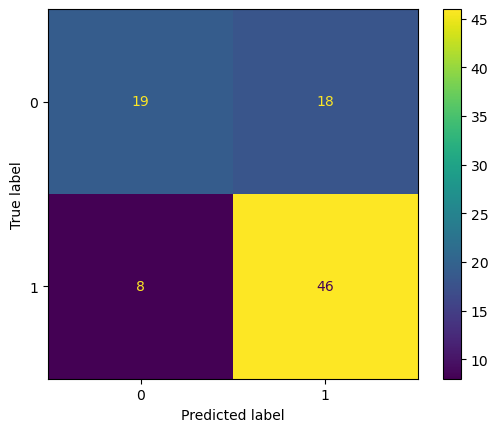

Precision: 0.71875
Recall: 0.8518518518518519
F1 Score: 0.7796610169491525
Accuracy: 0.7142857142857143
Precision: 0.71875
Recall: 0.8518518518518519
ROC AUC: 0.6826826826826827
True Positive Rate: 0.5135135135135135
False Positive Rate: 0.28125
Specificity: 0.71875
DATA PERC: 80
Confusion Matrix:
 [[25 12]
 [13 41]]


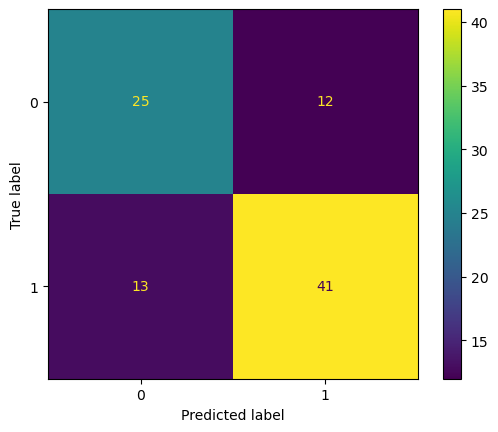

Precision: 0.7735849056603774
Recall: 0.7592592592592593
F1 Score: 0.7663551401869159
Accuracy: 0.7252747252747253
Precision: 0.7735849056603774
Recall: 0.7592592592592593
ROC AUC: 0.7174674674674675
True Positive Rate: 0.6756756756756757
False Positive Rate: 0.22641509433962265
Specificity: 0.7735849056603774
DATA PERC: 100
Confusion Matrix:
 [[25 12]
 [ 7 47]]


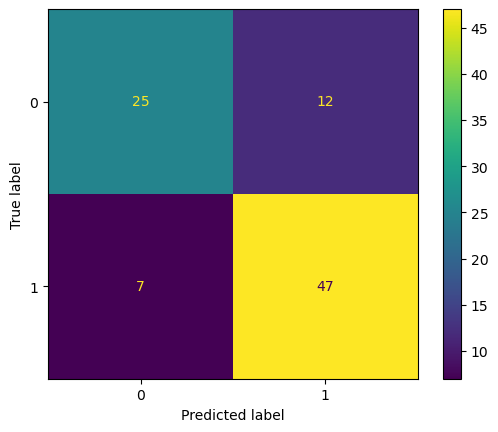

Precision: 0.7966101694915254
Recall: 0.8703703703703703
F1 Score: 0.8318584070796461
Accuracy: 0.7912087912087912
Precision: 0.7966101694915254
Recall: 0.8703703703703703
ROC AUC: 0.773023023023023
True Positive Rate: 0.6756756756756757
False Positive Rate: 0.2033898305084746
Specificity: 0.7966101694915254


,precision,recall,f1_score,accuracy,ROC AUC,sensitivity,specificity
20,0.764706,0.962963,0.852459,0.802198,0.765265,0.567568,0.764706
40,0.762712,0.833333,0.796460,0.747253,0.727477,0.621622,0.762712
60,0.718750,0.851852,0.779661,0.714286,0.682683,0.513514,0.718750
80,0.773585,0.759259,0.766355,0.725275,0.717467,0.675676,0.773585
100,0.796610,0.870370,0.831858,0.791209,0.773023,0.675676,0.796610


In [9]:
from sklearn import metrics

def performance_analysis(data_dict, percs, criterion, y_test):
    tot_metr = []
    for perc in percs:
        metr={}
        model = DecisionTreeClassifier(criterion=criterion)
        model.fit(data_dict[perc][0],data_dict[perc][1])
        y_pred = model.predict(X_test)
        
        print("DATA PERC:",perc)
        
        # Confusion Matrix
        cm = metrics.confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:\n", cm)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
        cm_display.plot()
        plt.show()

        # Precision, Recall, F1score
        p,r,f1,_ = metrics.precision_recall_fscore_support(y_test,y_pred,average='binary')
        print("Precision:",p)
        print("Recall:",r)
        print("F1 Score:",f1)
        metr['precision']=p
        metr['recall']=r
        metr['f1_score'] = f1

        # Accuracy
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
        metr['accuracy']=accuracy

        # Precision
        precision = metrics.precision_score(y_test, y_pred)
        print("Precision:", precision)

        # Recall
        recall = metrics.recall_score(y_test, y_pred)
        print("Recall:", recall)

        # ROC and AUC
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC AUC:", roc_auc)
        metr['ROC AUC'] = roc_auc

        # True Positive Rate -> TP/TP+FN   -  Sensitivity
        tpr = cm[0,0]/(cm[0,0]+cm[0,1])
        print("True Positive Rate:", tpr)
        metr['sensitivity'] = tpr

        # False Positive Rate -> FP/FP+TN
        fpr = cm[0,1]/(cm[0,1]+cm[1,1])
        print("False Positive Rate:", fpr)

        # Specificity -> TN/TN+FP
        specificity = cm[1,1]/(cm[1,1]+cm[0,1])
        print("Specificity:", specificity)
        metr['specificity'] = specificity
        tot_metr.append(metr)
    
    metric_df = pd.DataFrame(tot_metr,index=percs)
    return metric_df

performance_analysis(data_dict, percs,criterion, y_test)
